In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
import sklearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [4]:
merge_data = pd.read_csv('../Data/Updated Data_V1.csv')

In [5]:
merge_data.head()

,Unnamed: 0,articleID,label,headline_v4,headline_postag,headline_stem
0,0,1,0,মুরগির হামলায় শেয়াল নিহত,মুরগির/NC হামলায়/NC শেয়াল/NC নিহত/JJ,মুগি হামলা শেয়াল নিহত
1,1,2,0,বিটিভিতে যেবার ইন্টারভিউ গেলাম,বিটিভিতে/NC যেবার/NV ইন্টারভিউ/NC গেলাম/VM,বিটিভিতে যেবা ইন্টারভিউ গে
2,2,3,0,বিদেশ উন্নতমানের বিরোধীদল আমদানি পরামর্শ অনলাই...,বিদেশ/NC উন্নতমানের/NC বিরোধীদল/NC আমদানি/NC প...,বিদেশ উন্নতমান বিরোধী আমদানি পরামর্শ অনলাইন রা...
3,3,4,0,অবসর নেয়ার ঘোষণা মেসি,অবসর/NC নেয়ার/NC ঘোষণা/NC মেসি/NP,অবস নেয়া ঘোষণা মেসি
4,4,5,0,মাদারফাকার নহে ব্রাদারফাকার সাকা দৈনিক মতিকণ্ঠ,মাদারফাকার/NC নহে/VM ব্রাদারফাকার/NC সাকা/NC দ...,মাদাফাকা নহে ব্াদাফাকা সাকা দৈন মতিকণ্ঠ


In [6]:
merge_data.drop('Unnamed: 0',inplace=True,axis = 1)

In [7]:
merge_data.head(3)

,articleID,label,headline_v4,headline_postag,headline_stem
0,1,0,মুরগির হামলায় শেয়াল নিহত,মুরগির/NC হামলায়/NC শেয়াল/NC নিহত/JJ,মুগি হামলা শেয়াল নিহত
1,2,0,বিটিভিতে যেবার ইন্টারভিউ গেলাম,বিটিভিতে/NC যেবার/NV ইন্টারভিউ/NC গেলাম/VM,বিটিভিতে যেবা ইন্টারভিউ গে
2,3,0,বিদেশ উন্নতমানের বিরোধীদল আমদানি পরামর্শ অনলাই...,বিদেশ/NC উন্নতমানের/NC বিরোধীদল/NC আমদানি/NC প...,বিদেশ উন্নতমান বিরোধী আমদানি পরামর্শ অনলাইন রা...


# Uni Gram Approach

In [8]:
# Feature Extraction
tfidf = TfidfVectorizer(sublinear_tf=True,
                            analyzer='word',
                            ngram_range=(1,1),
                            max_features=8000)

In [9]:
X = tfidf.fit_transform(merge_data['headline_v4'])

In [10]:
Y = merge_data['label']

In [11]:
smk_biagram = SMOTETomek(random_state=42)
X_v1,Y_v1=smk_biagram.fit_sample(X,Y)

In [12]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_v1)))

Original dataset shape Counter({1: 52588, 0: 4527})
Resampled dataset shape Counter({0: 52586, 1: 52586})


In [16]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(X_bv1,Y_v1,test_size = 0.30, random_state= True)

In [15]:
# Decission Tree Classifier
decession_tree = DecisionTreeClassifier()
decession_tree.fit(x_train,y_train)
y_pred_decession_tree = decession_tree.predict(x_test)
print("Decission Tree Classifier")
print(classification_report(y_test, y_pred_decession_tree))

# Random Forest  Classifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred_random_forest = random_forest.predict(x_test)
print("Random Forest  Classifier")
print(classification_report(y_test, y_pred_random_forest))


# KNN  Algo
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_pred_knn_classifier = knn_classifier.predict(x_test)
print("KNN  Algo")
print(classification_report(y_test, y_pred_knn_classifier))


# Multinomial Naive Bias
mulNB = MultinomialNB()
mulNB.fit(x_train,y_train)
y_pred_mulNB = mulNB.predict(x_test)
print("Gaussian Naive Bias")
print(classification_report(y_test, y_pred_mulNB))


Decission Tree Classifier
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     15723
           1       0.88      0.83      0.86     15829

    accuracy                           0.86     31552
   macro avg       0.86      0.86      0.86     31552
weighted avg       0.86      0.86      0.86     31552

Random Forest  Classifier
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     15723
           1       0.91      0.87      0.89     15829

    accuracy                           0.89     31552
   macro avg       0.89      0.89      0.89     31552
weighted avg       0.89      0.89      0.89     31552

KNN  Algo
              precision    recall  f1-score   support

           0       0.66      0.96      0.78     15723
           1       0.93      0.51      0.66     15829

    accuracy                           0.73     31552
   macro avg       0.80      0.74      0.72     31552
weighted avg

NameError: name 'GradientBoostingClassifier' is not defined

In [20]:
# Gradient bossting
gradient_bossting = GradientBoostingClassifier(random_state=3)
gradient_bossting.fit(x_train,y_train)
y_pred_gradientbossting = gradient_bossting.predict(x_test)
print("GradientBosting  Algo")
print(classification_report(y_test, y_pred_gradientbossting))


# SVM
svm_class = svm.SVC(kernel='poly')
svm_class.fit(x_train,y_train)
y_pred_svm = svm_class.predict(x_test)
print("SVM  Algo")
print(classification_report(y_test, y_pred_svm))


# Logistic Regressor
logis_reg =LogisticRegression()
logis_reg.fit(x_train,y_train)
y_pred_log = logis_reg.predict(x_test)
print("Logistic Reg  Algo")
print(classification_report(y_test, y_pred_log))

GradientBosting  Algo
              precision    recall  f1-score   support

           0       0.69      0.78      0.73     15723
           1       0.75      0.66      0.70     15829

    accuracy                           0.72     31552
   macro avg       0.72      0.72      0.72     31552
weighted avg       0.72      0.72      0.72     31552

GradientBosting  Algo
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     15723
           1       0.96      0.77      0.86     15829

    accuracy                           0.87     31552
   macro avg       0.88      0.87      0.87     31552
weighted avg       0.88      0.87      0.87     31552

GradientBosting  Algo
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     15723
           1       0.73      0.71      0.72     15829

    accuracy                           0.72     31552
   macro avg       0.72      0.72      0.72     31552
weighted

C:\Users\Nadim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Random Forest  Classifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred_random_forest = random_forest.predict(x_test)
print("Random Forest  Classifier")
print(classification_report(y_test, y_pred_random_forest))

Random Forest  Classifier
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     15723
           1       0.91      0.87      0.89     15829

    accuracy                           0.89     31552
   macro avg       0.89      0.89      0.89     31552
weighted avg       0.89      0.89      0.89     31552



In [13]:
X1 = np.array(X_v1)
Y1 = np.array(Y_v1)

In [14]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10,random_state=None)
folds.get_n_splits(X_v1,Y_v1)

10

In [16]:
accurecy = []
for train_index, test_index in folds.split(X_v1,Y_v1):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_v1[train_index], X_v1[test_index], Y_v1[train_index], Y_v1[test_index]
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train,y_train)
    prediction = random_forest.predict(X_test)
    score = accuracy_score(prediction,y_test)
    accurecy.append(score)    

Train Index:  [  6558   6559   6560 ... 105169 105170 105171] 

Test Index:  [    0     1     2 ... 57842 57843 57844]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [ 6558  6559  6560 ... 63101 63102 63103]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [11817 11818 11819 ... 68360 68361 68362]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [17075 17076 17077 ... 73619 73620 73621]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [22333 22334 22335 ... 78878 78879 78880]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [27591 27592 27593 ... 84137 84138 84139]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [32849 32850 32851 ... 89395 89396 89397]
Train Index:  [     0      1      2 ... 105169 105170 105171] 

Test Index:  [38108 38109 38110 ... 94653 94654 94655]
Train Index:  [     0      1      2 ... 105169 1

In [21]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5258
           1       0.95      0.95      0.95      5259

    accuracy                           0.95     10517
   macro avg       0.95      0.95      0.95     10517
weighted avg       0.95      0.95      0.95     10517



In [17]:
np.array(accurecy).mean()

0.900717878096407

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import metrics

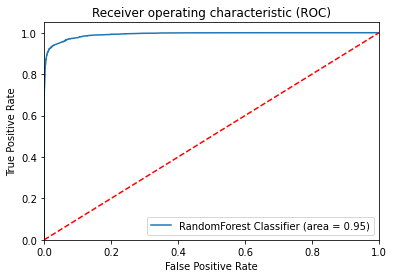

In [19]:
ranfor_roc_auc = roc_auc_score(y_test, random_forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier (area = %0.2f)' % ranfor_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Ranfor_ROC')
plt.show()

In [22]:
accurecy

[0.66447993915193,
 0.8362806617227609,
 0.9348673576114862,
 0.9315394123799563,
 0.9381002186935438,
 0.9389559760387943,
 0.9400969858324617,
 0.9381002186935438,
 0.9336312636683465,
 0.9511267471712466]

In [13]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [ ]:
X_v1,Y_v1

<ipython-input-17-21b6bdb96f16>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-17-21b6bdb96f16>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-17-21b6bdb96f16>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-17-21b6bdb96f16>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-17-21b6bdb96f16>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-17-21b6bdb96f16>:15: DeprecationWarning: scipy.interp i

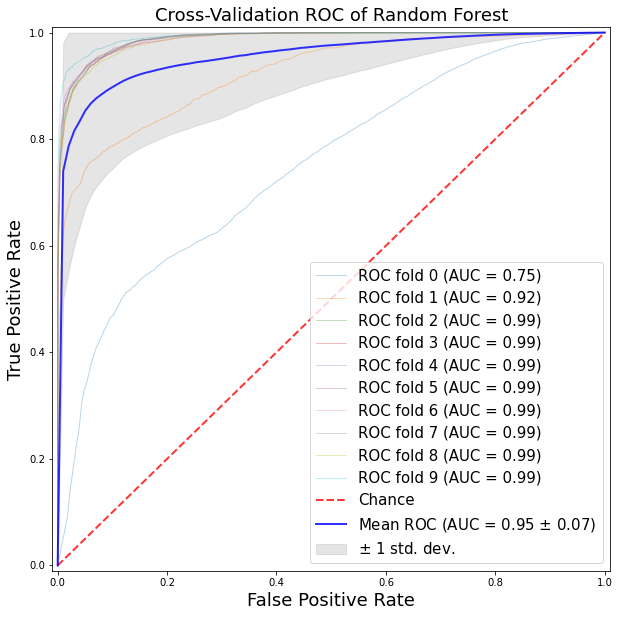

In [17]:
# Classification and ROC analysis
classifier = RandomForestClassifier()
cv = StratifiedKFold(n_splits=10)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_v1, Y_v1):
    probas_ = classifier.fit(X_v1[train], Y_v1[train]).predict_proba(X_v1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_v1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Random Forest',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()